In [54]:
import pandas as pd
import numpy as np
import os
from utils import base

features = [
    'x',
    'y',
    'z',
    'roll',
    'pitch',
    'yaw',
    'thumb',
    'forefinger',
    'middle_finger',
    'ring_finger',
    'little_finger',
    ]


In [55]:
path = "./tctodd/"
#path = "../../Desktop/MML Project/tctodd/"
dirs = os.listdir(path=path)
weeks = sorted([i for i in dirs if i != ".DS_Store"])
filenames = sorted(os.listdir(path+weeks[1]))

data = []
labels = dict()
label_cnt = 0

for w in weeks:
    temp_path = path+w+"/"
    filenames = sorted(os.listdir(temp_path))
    for fn in filenames:
        label = fn.split('.')[0][:-2]
        
        if label not in labels:
            labels[label] = label_cnt
            label_cnt += 1
            
        data.append({'label':labels[label], 'time_series':pd.read_csv(temp_path+fn, header=None, sep='\t',).values})
        

In [56]:
df = pd.DataFrame(data, columns=['label', 'time_series'])

In [57]:
df['length'] = df['time_series'].apply(lambda x: x.shape[0])

<AxesSubplot:xlabel='label', ylabel='length'>

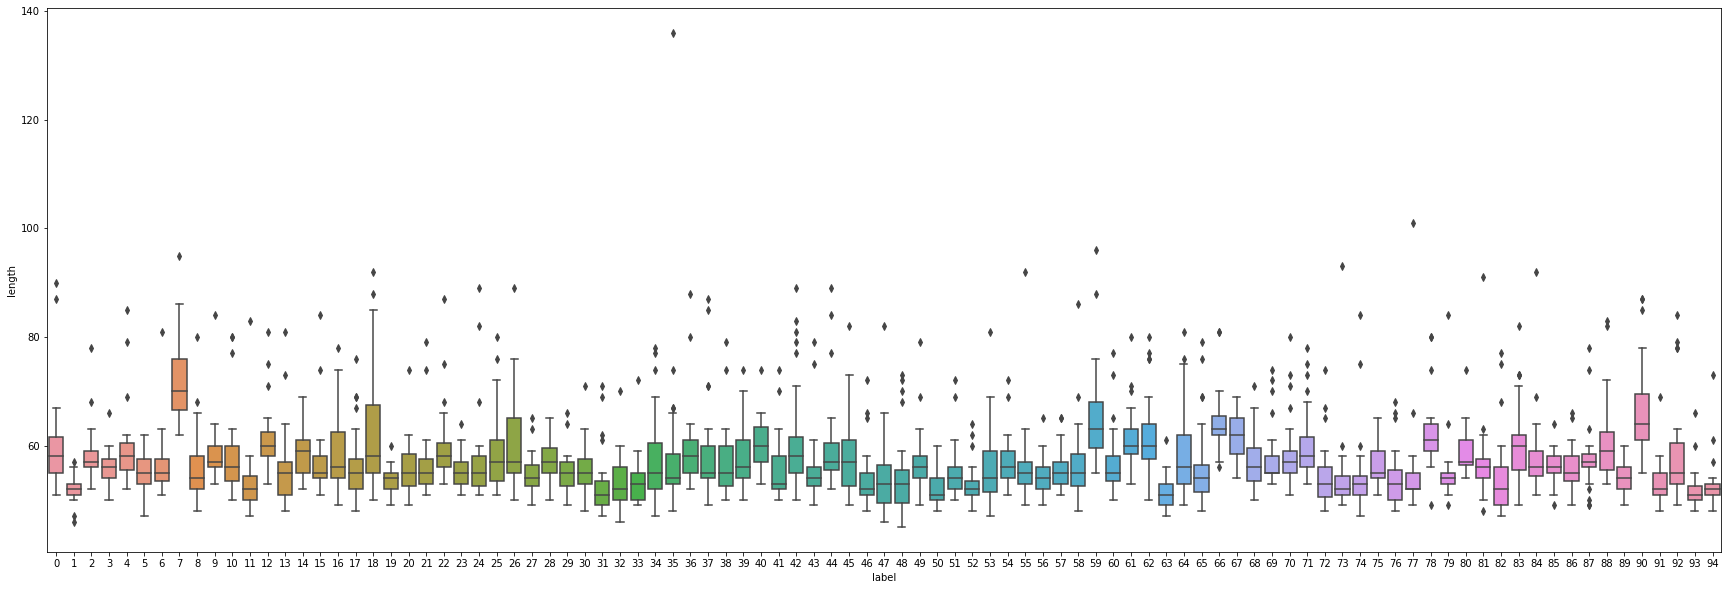

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
sns.boxplot(x=df["label"], y=df["length"])

In [92]:
x_min = sorted(df.length.unique())[0]
x_max = sorted(df.length.unique())[-1]
x_mean = np.round(df.length.mean())

In [17]:
df.length.mean()

57.29005847953216

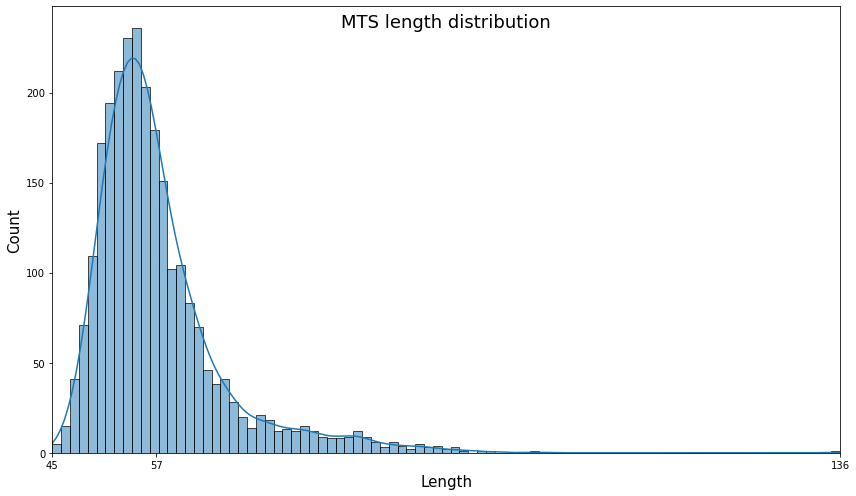

In [106]:
plt.figure(figsize=(12,7))
sns.histplot(data=df, x="length", kde=True)
plt.title("MTS length distribution", y=.94, fontsize=18)
plt.xlabel('Length', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks([x_min, x_mean, x_max])
plt.xlim((x_min, x_max))
plt.tight_layout()
plt.savefig("../images/length_distr.png", format='png', dpi=300)

In [39]:
classes_std = df.groupby('label').std()

In [40]:
classes_std['length'].argmin(), classes_std['length'].min(), 

(1, 2.449489742783178)

In [41]:
classes_std['length'].argmax(), classes_std['length'].max(), 

(35, 16.544423493067043)

In [61]:
inv = {v:k for k,v in labels.items()}
print(f'+ sbilanciata: {inv[35]}, - sbilanciata: {inv[1]}')

+ sbilanciata: hurry, - sbilanciata: I


In [43]:
df.groupby(['label'])['length'].min()[35], df.groupby(['label'])['length'].max()[35], df.groupby(['label'])['length'].mean()[35], df.groupby(['label'])['length'].std()[35]

(48, 136, 59.22222222222222, 16.544423493067043)

---------------------------------------

In [65]:
X = np.vstack(df['time_series'])

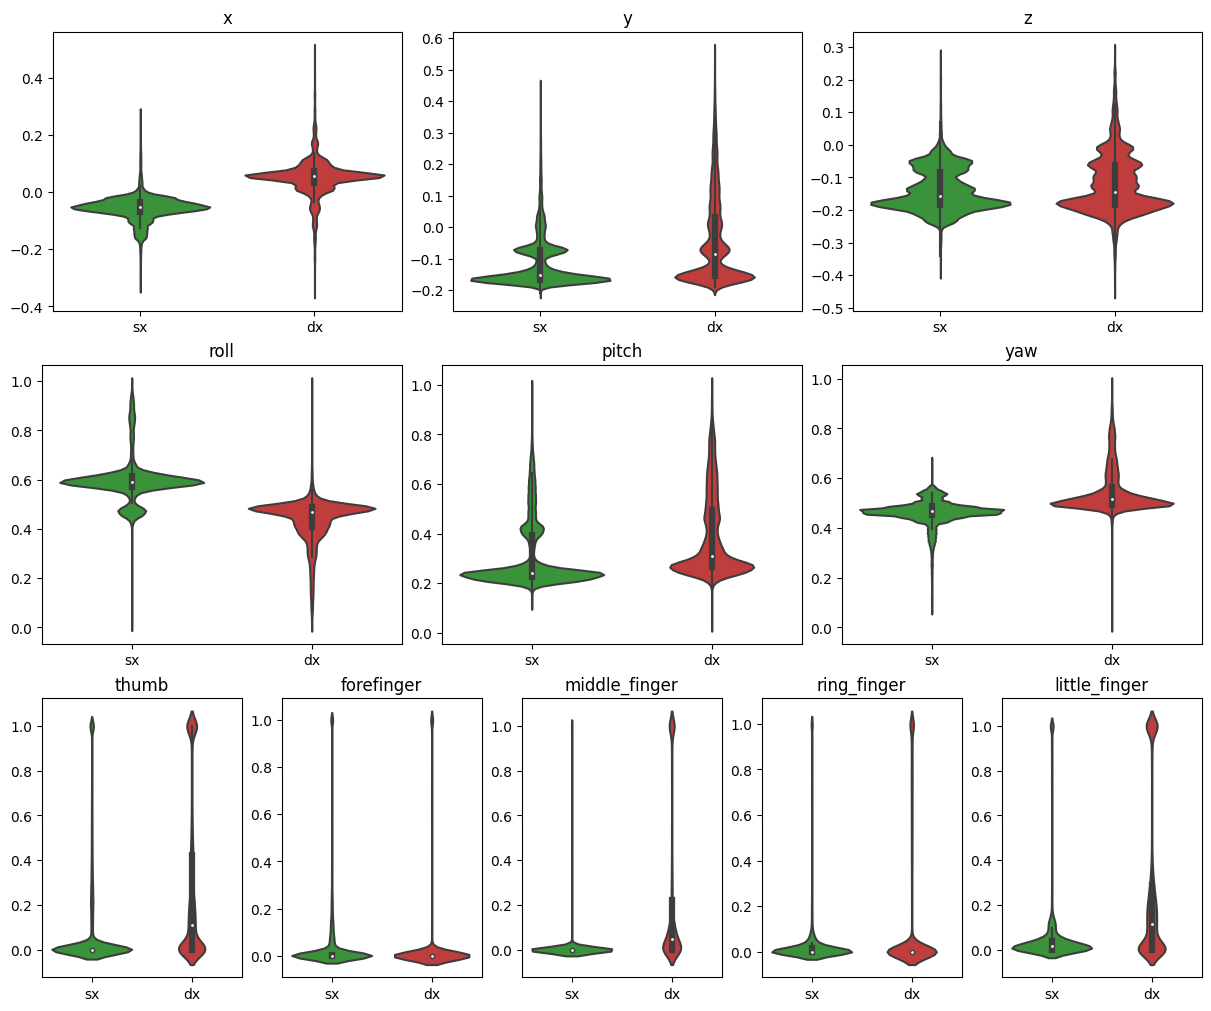

In [74]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
fig = plt.figure(figsize=(12,10), constrained_layout=True)
gs = GridSpec(3, 1, figure=fig)
gs1 = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0])
for n in range(3):
    x_sx, x_dx = X[:,n], X[:,n+ 11]
    df = pd.DataFrame({'sx': x_sx, 'dx': x_dx})
    ax = fig.add_subplot(gs1[n])
    ax.set_title(features[n])
    sns.violinplot(data=df, ax=ax, palette=['tab:green', 'tab:red'])
gs2 = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1])
for n in range(3):
    x_sx, x_dx = X[:,n+3], X[:,n+ 11+3]
    df = pd.DataFrame({'sx': x_sx, 'dx': x_dx})
    ax = fig.add_subplot(gs2[n])
    ax.set_title(features[n+3])
    sns.violinplot(data=df, ax=ax, palette=['tab:green', 'tab:red'])
gs3 = GridSpecFromSubplotSpec(1, 5, subplot_spec=gs[2])
for n in range(5):
    x_sx, x_dx = X[:,n+3+3], X[:,n+ 11+3+3]
    df = pd.DataFrame({'sx': x_sx, 'dx': x_dx})
    ax = fig.add_subplot(gs3[n])
    ax.set_title(features[n+3+3])
    sns.violinplot(data=df, ax=ax, palette=['tab:green', 'tab:red'])
plt.show()

## mean, std_dev, max, min analysis of one-handed, two-handed, double-handed signs

In [1]:
import pandas as pd
import numpy as np
import os
#from utils import base

features = [
    'x left',
    'y left',
    'z left',
    'roll left',
    'pitch left',
    'yaw left',
    'thumb left',
    'forefinger left',
    'middle finger left',
    'ring finger left',
    'little finger left',
    'x right',
    'y right',
    'z right',
    'roll right',
    'pitch right',
    'yaw right',
    'thumb right',
    'forefinger right',
    'middle finger right',
    'ring finger right',
    'little finger right'
    ]



#path = "../../Desktop/MML Project/tctodd/"
path = "/Users/lorenzo/Documents/Lorenzo/Università/Magistrale/I anno/01_Mathematics in ML/Project/auslan/auslan-classification/tctodd/"
dirs = os.listdir(path=path)
weeks = sorted([i for i in dirs if i != ".DS_Store"])
filenames = sorted(os.listdir(path+weeks[1]))

data = []
labels = dict()
label_cnt = 0

for w in weeks:
    temp_path = path+w+"/"
    filenames = sorted(os.listdir(temp_path))
    for fn in filenames:
        label = fn.split('.')[0][:-2]
        
        if label not in labels:
            labels[label] = label_cnt
            label_cnt += 1
            
        data.append({'label':labels[label], 'time_series':pd.read_csv(temp_path+fn, header=None, sep='\t',).values})
        

df = pd.DataFrame(data, columns=['label', 'time_series'])

In [2]:
df['length'] = df.time_series.apply(lambda x: x.shape[0])

In [3]:
length = df.length
X = df.time_series
y = df.label

In [26]:
X_stack = np.vstack(X)
df_X = pd.DataFrame(X_stack, columns=features)
df_X.describe().T[['min','max', 'mean', 'std']]

,min,max,mean,std
x left,-0.342182,0.284053,-0.055462,0.043212
y left,-0.210003,0.451930,-0.113013,0.079858
z left,-0.397100,0.279580,-0.138106,0.065494
roll left,0.003024,0.997842,0.598195,0.088800
pitch left,0.118787,0.993448,0.307559,0.132904
yaw left,0.063674,0.674636,0.463156,0.052315
thumb left,0.000000,1.000000,0.089838,0.229754
forefinger left,0.000000,1.000000,0.052772,0.170532
middle finger left,0.000000,1.000000,0.030192,0.145386
ring finger left,0.000000,1.000000,0.055055,0.180508


In [27]:
df_X.describe().T[['min','max', 'mean', 'std']].round(decimals=3)#.to_csv("dataset_min_max_mean_std.csv", header=True)

In [4]:
one = labels['hello'] # one-handed
two = labels['God'] #two-handed
spec_two = labels['where'] #specular two-handed

one_mask = df['label'] == one
two_mask = df['label'] == two
spec_two_mask = df['label'] == spec_two

one_data = df[one_mask].iloc[0]['time_series']
two_data = df[two_mask].iloc[0]['time_series']
spec_two_data = df[spec_two_mask].iloc[0]['time_series']

In [5]:
one_data_df = pd.DataFrame(one_data, columns=features)
two_data_df = pd.DataFrame(two_data, columns=features)
spec_two_data_df = pd.DataFrame(spec_two_data, columns=features)

In [9]:
statistics = ['mean', 'std']#, 'min', 'max']

In [12]:
one_data_df.describe().T[statistics].round(decimals=3)#.to_csv('hello_mean_std.csv', header=True)

In [17]:
two_data_df.describe().T[statistics].round(decimals=3)#.to_csv('god_mean_std.csv', header=True)

,mean,std
x left,-0.124,0.061
y left,0.020,0.022
z left,-0.045,0.021
roll left,0.472,0.082
pitch left,0.535,0.023
yaw left,0.495,0.017
thumb left,0.175,0.364
forefinger left,0.198,0.390
middle finger left,0.179,0.375
ring finger left,0.204,0.384


In [18]:
spec_two_data_df.describe().T[statistics].round(decimals=3)#.to_csv('where_mean_std.csv', header=True)

,mean,std
x left,-0.143,0.038
y left,0.014,0.027
z left,0.007,0.021
roll left,0.521,0.174
pitch left,0.506,0.023
yaw left,0.514,0.017
thumb left,0.589,0.212
forefinger left,0.081,0.051
middle finger left,0.000,0.000
ring finger left,0.001,0.002


## Longest sign

In [11]:
longest_sign_id = df.length.argmax()
lab = df.label[longest_sign_id]
longest_time_series = df.time_series[longest_sign_id]

In [12]:
inv_lab = {v:k for k,v in labels.items()}
lab = inv_lab[lab]

In [ ]:
from utils import visualization
sx_plot_dict = {'marker':'s', 'markersize':5, 'color':'tab:green', 'alpha':1, 'linestyle':'dotted', 'label':'sx'}
dx_plot_dict = {'marker':'s', 'markersize':5, 'color':'tab:red', 'alpha':1, 'linestyle':'dotted', 'label':'dx'}
visualization.plot_frames(longest_time_series, .3, lab, folder='hurry_gif', dx_plot_dict=dx_plot_dict, sx_plot_dict=sx_plot_dict)

Text(0, 0.5, '')

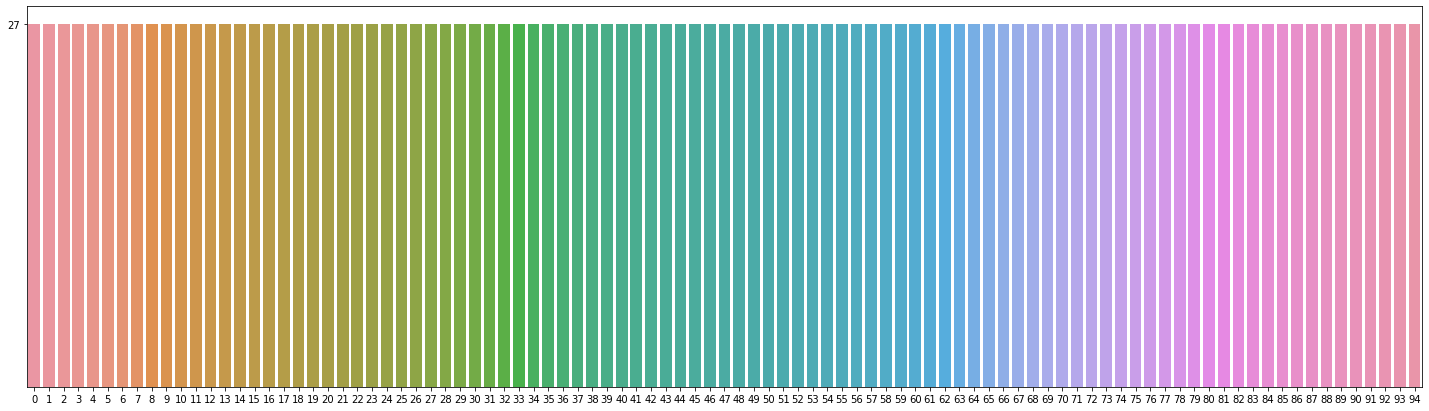

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,7))
sns.barplot(x=df.label.value_counts().index, y=df.label.value_counts())
plt.yticks([27])
plt.ylabel('')